# Development examples

In [1]:
import numpy as np
import uproot4 as uproot
import heputils

heputils.plot.set_style("ATLAS")

In [2]:
root_file = uproot.open("example.root")
mass_hists = [
    heputils.convert.uproot_to_hist(root_file[key]) for key in root_file.keys()
]
data_hist = mass_hists[-1]
mass_hists = mass_hists[:-1]

In [3]:
labels = [r"$t\bar{t}$", r"$W+$jets", "Other", "Signal"]
colormap = ["darkorange", "steelblue", "firebrick", "purple"]

scale_factors = np.ones(len(mass_hists))
scale_factors[-1] = 10

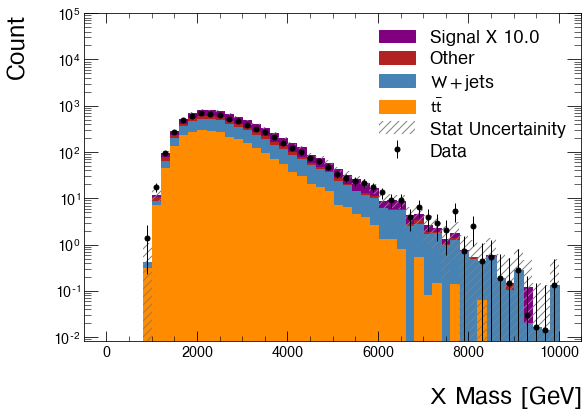

In [4]:
ax = heputils.plot.stack_hist(
    mass_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    scale_factors=scale_factors,
)

# Stat uncet and data should be on the top of the legend order
import mplhep

mplhep.histplot(
    data_hist,
    yerr=np.sqrt(data_hist),
    histtype="errorbar",
    color="black",
    label="Data",
    ax=ax,
)
ax.set_ylim(top=1e5)
ax.legend(loc="best");

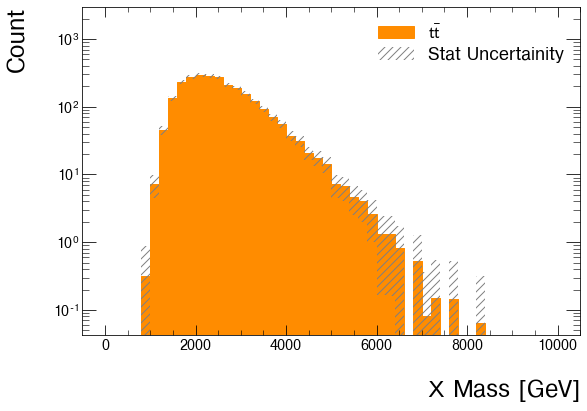

In [5]:
ax, artists = heputils.plot.stack_hist(
    mass_hists[0],
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    return_artists=True,
)

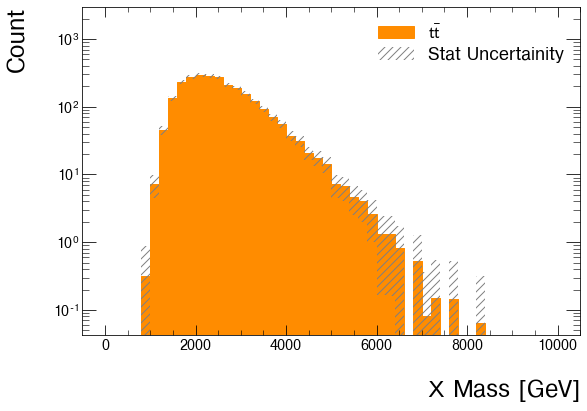

In [6]:
ax.figure

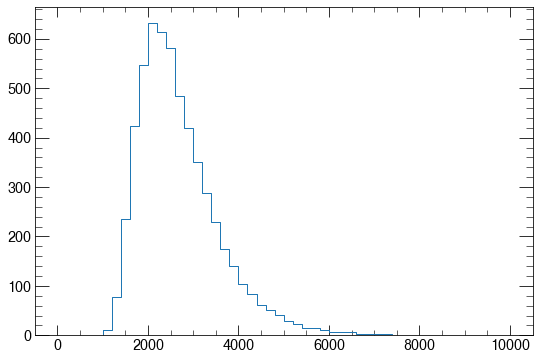

In [7]:
stacked_hist = heputils.convert.stack_hists(mass_hists)
stacked_hist.plot();

In [8]:
stacked_hist

Hist(Regular(50, 0, 10000, label='Axis 0'), storage=Double()) # Sum: 5680.492882434512